<a href="https://colab.research.google.com/github/Bhomic-OGJ/Digital-Watermarking-practice/blob/main/semiblind_watermarking_gj_cxmark_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color ="#fff">om jai shree ganeshai namah</font>

<font color="#5500ff">Date: 6 November 2024</font>

Doubts to ask:
- when we give the dataset for the regressor to learn, should we append all the coefficients in a single vector and make it the y vector and after dividing it by Q we give it as input x.
- or should we training the regressor by considering the whole set of modulated coefficients of an image as x and the original coefficients as y correspondingly. and then train the model again on different set of such coefficients.

In [1]:
!pip install PyWavelets
!pip install qiskit
!pip install qiskit_algorithms
!pip install qiskit_machine_learning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 8.6 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512554 sha256=8f823844778881ca97e3cbab22f117c7f229d7c6d935f1461c6c647535893fbc
  Store

In [ ]:
import cv2
import pywt
import numpy as np
from sklearn.linear_model import Ridge
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit_algorithms.optimizers import L_BFGS_B
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.circuit.library import QNNCircuit
from google.colab.patches import cv2_imshow

In [ ]:
def dwt2(image, level=4):
    coeffs = pywt.wavedec2(image, 'haar', level=level)
    return coeffs

def idwt2(coeffs):
    return pywt.waverec2(coeffs, 'haar')

def qnn_reg_train(X, y):
  # construct simple feature map
  param_x = Parameter("x")
  feature_map = QuantumCircuit(1, name="fm")
  feature_map.ry(param_x, 0)

  # construct simple ansatz
  param_y = Parameter("y")
  ansatz = QuantumCircuit(1, name="vf")
  ansatz.ry(param_y, 0)

  # construct a circuit
  qc = QNNCircuit(feature_map=feature_map, ansatz=ansatz)

  # construct QNN
  regression_estimator_qnn = EstimatorQNN(circuit=qc)

  regressor = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=10),
    # callback=callback_graph,
  )

  regressor.fit(X, y)

  return regressor

def vqr_train():
  param_x = Parameter("x")
  feature_map = QuantumCircuit(1, name="fm")
  feature_map.ry(param_x, 0)

  param_y = Parameter("y")
  ansatz = QuantumCircuit(1, name="vf")
  ansatz.ry(param_y, 0)

  vqr = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=L_BFGS_B(maxiter=5),
    callback=callback_graph
  )
  vqr.fit(X, y)
  return vqr

def qnn_reg_predict(model, X):
  return model.predict(X)

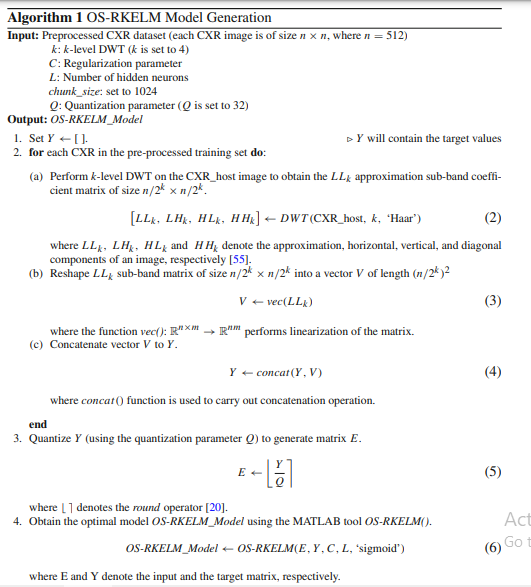

In [ ]:
#or_rkelm_train

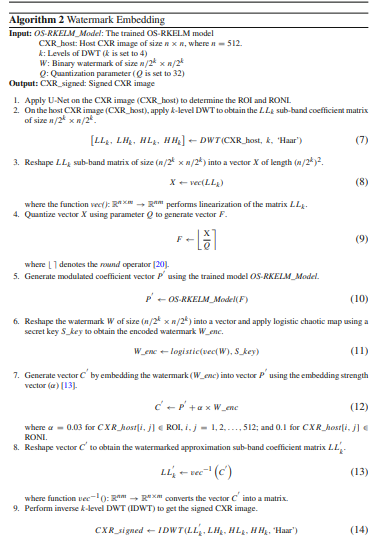

In [ ]:
def logistic_map(x, r):
    return r * x * (1 - x)

def generate_key_stream(length, x0, r):
    key_stream = []
    x = x0
    for _ in range(length):
        x = logistic_map(x, r)
        # Convert to binary (0 or 1)
        key_stream.append(1 if x > 0.5 else 0)
    return key_stream

def xor_encrypt_decrypt(data, key_stream):
    return bytes([b ^ k for b, k in zip(data, key_stream)])

def text_to_bytes(text):
    return text.encode('utf-8')

def bytes_to_text(byte_data):
    return byte_data.decode('utf-8')

def encrypt_decrypt_message(message, x0, r):
    data_bytes = text_to_bytes(message)

    key_stream = generate_key_stream(len(data_bytes), x0, r)

    result_bytes = xor_encrypt_decrypt(data_bytes, key_stream)

    return result_bytes

x0 = 0.4  # Initial condition for logistic map
r = 3.99  # Chaos parameter, close to chaotic regime

plaintext = "Hello, world!"
print("Plaintext:", plaintext)

ciphertext_bytes = encrypt_decrypt_message(plaintext, x0, r)
print("Ciphertext (bytes):", ciphertext_bytes)

decrypted_bytes = encrypt_decrypt_message(bytes_to_text(ciphertext_bytes), x0, r)
decrypted_text = bytes_to_text(decrypted_bytes)
print("Decrypted text:", decrypted_text)

In [ ]:
def xor_encrypt_decrypt(data, key_stream):
    return bytes([b ^ k for b, k in zip(data, key_stream)])

def logistic(W, S_key):
    return xor_encrypt_decrypt(W, S_key)

def inv_logistic(w_enc_vec, S_key):
    return xor_encrypt_decrypt(w_enc_vec, S_key)

def watermark_embedding(image, W, alpha, model, S_key, Q=32, k=4):
  """
  image: host image
  k: k level dwt
  W: binary watermark
  alpha: watermarking strength
  Q: quantization parameter
  """
  img_coeffs = dwt2(image, level=k)
  ll_k = img_coeffs[0]
  ll_k_vector = ll_k.reshape(-1, 1)

  F = ll_k_vector/Q

  P_ = model.predict(F)

  W_enc = logistic(W, S_key)

  C_ = P_ + alpha * W_enc

  ll_k_ = C_.reshape(ll_k.shape)

  img_coeffs[0] = ll_k_

  watermarked_img = idwt2(img_coeffs, level = k)

  return watermarked_img

  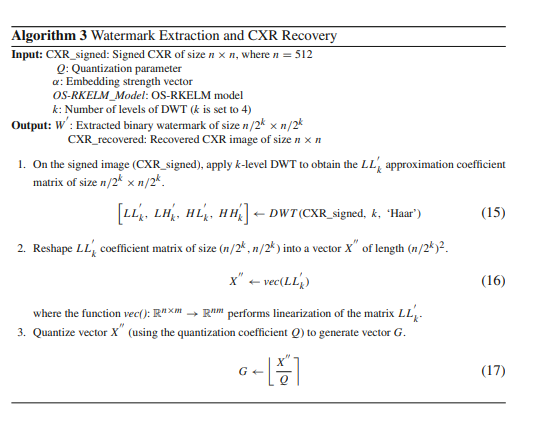

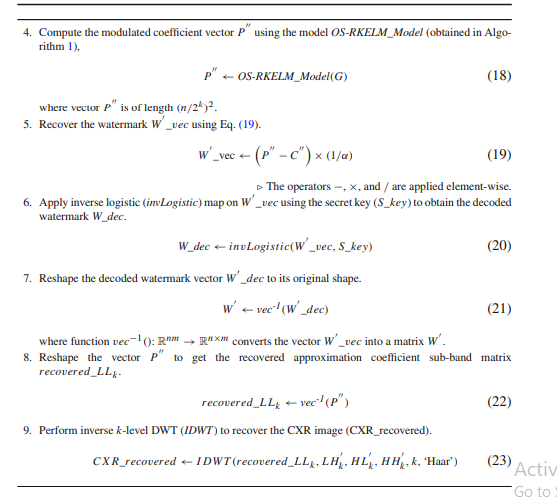

In [ ]:
def watermark_extraction_and_recovery(watermarked_img, model, S_key, Q=32, alpha=0.04, k=4):
  img_coeffs = dwt2(watermarked_img, level=k)
  ll_k = img_coeffs[0]
  x__ = ll_k.reshape(-1, 1)
  G = x__/Q
  p__ = model.predict(G)

  w_enc_vec = (p__ - x__)/alpha

  w_dec = inv_logistic(w_enc_vec, S_key=S_key)

  w_dec_img = w_dec.reshape(ll_k.shape)

  recovered_ll_k = p__.rehape(ll_k.shape)
  img_coeffs[0] = recovered_ll_k
  host_img_recovered = idwt2(img_coeffs, level=k)

  return (w_dec_img, host_img_recovered)


Host Image R


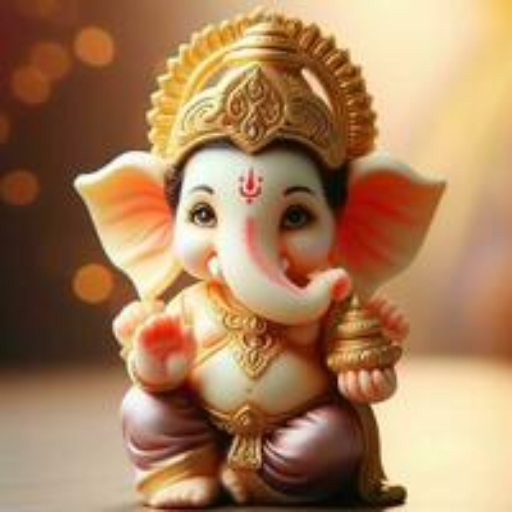


Watermark Image


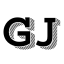

In [ ]:
base_folder = "/content/drive/MyDrive/semiblind_watermarking_gj/"
host_img_path = base_folder + "ganeshji.jpg"
watermark_path = base_folder + "wm.png"

host_img = cv2.imread(host_img_path)
host_img_r = cv2.resize(host_img, (512, 512))
watermark = cv2.imread(watermark_path)

print("Host Image R")
cv2_imshow(host_img_r)
print("\nWatermark Image")
cv2_imshow(watermark)

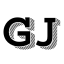

In [ ]:
watermark_gray = cv2.cvtColor(watermark, cv2.COLOR_BGR2GRAY)
cv2_imshow(watermark_gray)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


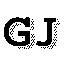

In [ ]:
binary_watermark = (watermark_gray > 255/2).astype(np.uint8)
print(binary_watermark)
cv2_imshow(binary_watermark*255)

In [ ]:
x0 = 0.4  # Initial condition for logistic map
r = 3.99  # Chaos parameter, close to chaotic regime
key_stream = generate_key_stream(64*64, x0, r)
print(key_stream)

[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 

In [ ]:
# host_img_r = host_img_r.reshape(-1)
# print(host_img_r)

In [ ]:
host_img_b = host_img_r[:,:,0]
print(host_img_b.shape)

(512, 512)


In [ ]:
def osrkelm(E, Y, C, L, a_fun = 'sigmoid'):
  """
  E: input image (Quantized with Q)
  Y: output images for the mode (non-quantized)
  C: regularization parameter
  L: no of layers
  a_fun: activation function
  """
  model = Ridge(alpha=1.0)
  model.fit(E, Y)

  return model

def os_rkelm_model_generation(dataset, C, L, k=4, chunk_size=1024, Q=32):
  """
  dataset: contains all the images of training dataset
  k: k level dwt (set to 4)
  """
  Y = np.array([])

  for img in dataset:
    print("img.shape: ", img.shape)
    img_coeff = dwt2(img, level = k)
    ll_k = img_coeff[0]
    ll_k_vector = ll_k.reshape(-1)
    # Y.append(ll_k_vector)
    Y = np.append(Y, ll_k_vector)

  Y = np.array(Y)
  E = Y/Q

  print("E.shape: ",E.shape," | Y.shape: ",Y.shape)

  # model = osrkelm(E, Y, C, L, 'sigmoid')

  E = E.reshape((E.shape[0],1))
  model = qnn_reg_train(E, Y)

  return model


In [ ]:
def get_dataset_from_images(img_arr):
  dataset = []
  for img_name in img_arr:
    img_path = base_folder + img_name
    img_np = cv2.imread(img_path)
    img_b = img_np[:,:,0]
    dataset.append(img_b)
  return dataset

In [ ]:
img_arr = ["cutu_ganesha.png", "ganeshji.jpg"]

dataset = get_dataset_from_images(img_arr) #[host_img_b]

model = os_rkelm_model_generation(dataset, C=None,L=None, k=4, chunk_size=1024, Q=32)

img.shape:  (360, 360)
img.shape:  (200, 200)
E.shape:  (698,)  | Y.shape:  (698,)


In [ ]:
tll4 = np.array([dwt2(host_img_r, level=4)[0].reshape(-1)])
print("original tll4: ", tll4)

q_tll4 = (tll4/32).T
print("quantized tll4 shape ",q_tll4.shape)

pred_ll4 = model.predict(q_tll4)
print("pred_ll4: ", pred_ll4)

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(


original tll4:  [[1068.   1220.25 1381.75 ... 3654.75 3562.75 3473.  ]]
quantized tll4 shape  (16384, 1)
pred_ll4:  [[ 0.75181176]
 [ 0.69283586]
 [-0.45368489]
 ...
 [ 0.99213763]
 [-0.99006021]
 [ 0.88790881]]


In [ ]:
x = np.array(q_tll4)
y = np.array(tll4).reshape(-1)
print(x.shape, y.shape)
qmodel = qnn_reg_train(x, y)


(16384, 1) (16384,)


In [ ]:
pred_ll4 = qmodel.predict(x)
print("pred_ll4: ", pred_ll4)

pred_ll4:  [[-0.23557451]
 [-0.98155079]
 [-0.14162212]
 ...
 [-0.88349956]
 [ 0.72888266]
 [-0.46158701]]


In [ ]:
print("y: ",y)

y:  [1068.   1220.25 1381.75 ... 3654.75 3562.75 3473.  ]
